# Introduction to Python - Data Analysis with Pandas 

## Problem Set

In [1]:
# Author: Alex Schmitt (schmitt@ifo.de)

import datetime
print('Last update: ' + str(datetime.datetime.today()))

Last update: 2017-05-29 11:15:54.550773


## Question 1

Run the following cell from the lecture to load the data on Bundesliga champions into a Pandas Series.

In [20]:
import pandas as pd
Df = pd.read_csv('data/champions.csv')
ts = Df['Club']

(a) How many clubs became champion at least once? How often was Bayern Munich champion?

(b) Use a Pandas command to see the first year in the data set. 

(c) Write a function that takes the data set and a year as arguments and prints the champion in this particular year. Which club won the championship in 1998? 

(d) Print out all clubs that were champions more than three times.

(e) Write a function that takes a series and returns the club that has won the second-most championships since 1964. Hint: Useful for this question are the **value_counts** and **argmax** methods, and logical arrays.

(f) Generate a bar chart with all champions since 1963/64, analogous to the one in the lecture. 

Bonus challenge: Answer question (f) *without using Pandas' plot method*. Compare the lecture notebook for help. You will need to find a way to get a list of all clubs in the data set, with each club appearing only once.

In [21]:
## (a): This information is provided in the describe method; alternatively, you can use the value_counts method
print(ts.describe())
print('')

## (b) 
print('The first observation is from {}.'.format(ts.index[0]) )
print('')

## (c)
def get_champ(ts, year):
    print('In {}, {} was Bundesliga champion.'.format(year, ts[year]) )

get_champ(ts, 1998)    
print('')

## (d)
first = ts.value_counts()
print(first.loc[ first > 3 ])
print('')

## (e)
def second_most(series):
    s_max = series.max()
    return series[ series < s_max ].argmax()

print('{} has won the second-most championships since 1964.'.format(second_most(first) ) )


count                    54
unique                   12
top       FC Bayern München
freq                     26
Name: Club, dtype: object

The first observation is from 1964.

In 1998, 1. FC Kaiserslautern was Bundesliga champion.

FC Bayern München           26
Borussia Dortmund            5
Borussia Mönchengladbach     5
Werder Bremen                4
Name: Club, dtype: int64

Borussia Dortmund has won the second-most championships since 1964.


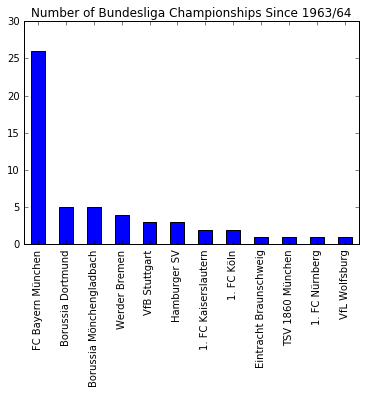

In [24]:
## question (d)
first = ts.value_counts()
first.plot(kind = 'bar', title = 'Number of Bundesliga Championships Since 1963/64')

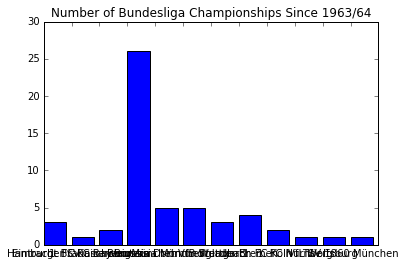

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

names = list(set(ts))
ts_num = ts.replace(names, range(0,len(names)))
count = ts_num.value_counts()

fig, ax = plt.subplots()
ax.bar(count.index, count)
ax.set_xticks(range(len(names)))
ax.set_xticklabels(names)
ax.set_title('Number of Bundesliga Championships Since 1963/64')

As an aside, if you don't the overlapping labels in the graph above, you can replace the names with abbreviations. here's a way to do this:

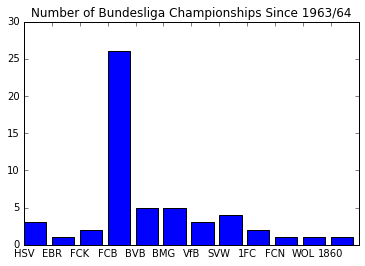

In [25]:
labels = {'FC Bayern München': 'FCB', 'Hamburger SV': 'HSV', 'Borussia Mönchengladbach': 'BMG', \
          'Werder Bremen': 'SVW', '1. FC Kaiserslautern': 'FCK', 'VfL Wolfsburg': 'WOL', \
          'Borussia Dortmund': 'BVB', 'TSV 1860 München': '1860', '1. FC Köln': '1FC', '1. FC Nürnberg': 'FCN', \
          'Eintracht Braunschweig': 'EBR', 'VfB Stuttgart': 'VfB'}
label_names = [labels[name] for name in names]

fig, ax = plt.subplots()
ax.bar(count.index, count)
ax.set_xticks(range(len(names)))
ax.set_xticklabels(label_names, fontsize=10)
ax.set_title('Number of Bundesliga Championships Since 1963/64')

## Question 2

Run the cell below which imports the data set on Bundesliga players and performs an operation similar to the one in the lecture, to get a column with last names and a column with first names.

In [39]:
df = pd.read_csv('data/BundesligaData.csv', sep = ';')

def reverse_name(name):
    L = name.split(" ")
    try:
        S = L[1] + " " + L[0]
    except:
        S = L[0]
    
    return S

df['name'] = df['name'].apply(reverse_name)
names = df['name'].str.split(expand=True)
# replace column 'name'
df['name'] = names[0]
## add column 'first name'
df['first_name'] = names[1]
## make name the index
df.set_index('name', drop = True, inplace = True)

(a) Who got the most scorer points in the 2016/17 season, and how many points did he get? A scorer point is awarded for both a goal and an assist.

(b) Are there any players in the data set that are younger than 25 and have scored more than 10 goals?

(c) At which positions do the players with the most red cards, the most yellow cards, and the most aerials won play?

(d) For the first five players, update the **'goals'** column with the the number of goals they scored on the matchday 34, namely {'Lewandowski' : 0, 'Aubameyang': 2, 'Mueller': 0, Costa': 0, 'Reus': 1}.


In [40]:
## question (a)

## define a series called 'points'
points = df['goals'] + df['assists']
## use argmax and max methods
print(points.argmax() )
print(points.max())

Lewandowski
34


In [62]:
## question (b)
A = (df['age'] < 25) & (df['goals'] >= 10)
# print( A.any() )

list(df.loc[A].index)

['Werner', 'Gnabry']

In [46]:
## question (c)
print( df['position'].loc[ df['red'].argmax() ] )
print( df['position'].loc[ df['yellow'].argmax() ] )
print( df['position'].loc[ df['aerialswon'].argmax() ] )

midfielder
midfielder
striker


In [40]:
## question (d)
goals_34 = {'Lewandowski' : 0, 'Aubameyang': 2, 'Mueller': 0, 'Costa': 0, 'Reus': 1}
goals_34 = pd.Series(goals_34)
df['goals'] = df['goals'].add(goals_34, fill_value = 0)
df.head()

,position,value,valuemax,age,goals,assists,yellow,red,shotspergame,passsuccess,aerialswon,rating,positioncode,first_name
name,,,,,,,,,,,,,,
Lewandowski,striker,80.0,80.0,28,30.0,4,5,0,4.2,75.0,1.8,7.71,3,Robert
Aubameyang,striker,65.0,65.0,27,31.0,2,3,0,3.6,70.3,1.3,7.40,3,Pierre-Emerick
Mueller,striker,60.0,75.0,27,5.0,12,0,0,2.2,76.2,1.8,7.30,3,Thomas
Reus,striker,40.0,50.0,27,6.0,4,1,1,2.3,74.6,0.4,7.03,3,Marco
Costa,striker,30.0,35.0,26,4.0,3,2,0,1.9,80.2,0.1,7.17,3,Douglas


## Question 3

The dataset used in this question comes from baseball, which may be a less-than exciting sport, but also one that generates a lot of data and is therefore very popular among (North American) data scientists. The file 'baseball_stats.csv' contains information on more than 18,000 players that have played in the US baseball league MLB at some point. The data includes the name, height and weight of a player, moreover its "handedness" (whether he bats with his left or right hand or both), his batting average (the percentage of at-bats in which he recorded a hit) and the number of home runs.

(a) Import the Pandas package and read the data in a Pandas dataframe. Use the **info** or the **head** method to make sure the data has been stored properly. 

(b) Find the player with the most homeruns in the history of the MLB. 

(c) How many players were recorded to be "switch hitters", i.e. to bat both left-handed or right-handed? Who has scored the most homeruns among this group?

(d) How often does an MLB player hit the ball on average? Using the **describe** method, you can see that the mean batting average is about 0.17. However, this includes a lot of players with an average of 0. Compute the mean batting average among those players who have actually hit something, i.e. with an average *greater than zero*.

(e) A popular question among baseball fans and analysts is whether there is a inherent difference in the batting performance between left- or right-handed batters. We can use a t-test to check the hypothesis that both groups come from the same population, i.e. that there is no systematic difference and all observed difference is due to sampling. Use the **ttest_ind** function in Scipy's **scipy.stats** module to compute a t-statistic under the null hypothesis
\begin{equation}
    \text{avg}_{LH} - \text{avg}_{RH} = 0.
\end{equation}
What can you conclude?


In [26]:
## Question (a)

# import pandas as pd

df = pd.read_csv('data/baseball_stats.csv')
print(df.info())
print('')
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18177 entries, 0 to 18176
Data columns (total 6 columns):
name          18177 non-null object
handedness    16974 non-null object
height        18177 non-null object
weight        18177 non-null object
avg           18177 non-null float64
HR            18177 non-null int64
dtypes: float64(1), int64(1), object(4)
memory usage: 852.1+ KB
None

           name handedness height weight    avg   HR
0  Brandon Hyde          R     75    210  0.000    0
1   Carey Selph          R     69    175  0.277    0
2  Philip Nastu          L     74    180  0.040    0
3    Kent Hrbek          L     76    200  0.282  293
4   Bill Risley          R     74    215  0.000    0


In [30]:
## Question (b)
ind = df['HR'].argmax()
print('The player with the most HRs in the history of baseball is {}.'.format(df['name'].loc[ind]) )

## alternative: sort_values and use iloc
# df.sort_values(by = 'HR', ascending = False, inplace = True)
# print('The player with the most HRs in the history of baseball is {}.'.format(df['name'].iloc[0]) )



The player with the most HRs in the history of baseball is Barry Bonds.


In [35]:
## Question (c)
switch = df['handedness'] == 'B'
## create a data set consisting of switch hitters only
df_switch = df.loc[switch]
print('{} players were switch hitters.'.format( len(df_switch) ) )
print('Among those, the player with the most HRs is {}.'.format( df_switch['name'].loc[df_switch['HR'].argmax()] ) )

1121 players were switch hitters.
Among those, the player with the most HRs is Mickey Mantle.


In [36]:
## Question (d)
index = df['avg'] > 0
print('Among players with a non-zero batting average, the mean average is {:.3}.'.format(df['avg'].loc[index].mean()) )

Among players with a non-zero batting average, the mean average is 0.223.


In [36]:
## Question (e)

# from scipy.stats import ttest_ind

## sample of batting averages for right-handed batters 
y0 = df['avg'].loc[df['handedness'].map(lambda x: x == 'R')]
## sample of batting averages for left-handed batters 
y1 = df['avg'].loc[df['handedness'].map(lambda x: x == 'L')]


stat = ttest_ind(y0, y1, equal_var = False)
print(stat)


Ttest_indResult(statistic=-9.9357022262421069, pvalue=3.8102742258882745e-23)


## Question 4
Download data from worldbank on the development of forest coverage over the last 20 years and correlate this data with the development of GDP and CO2 Emissions. 
To solve this problem we will give you some hints here. The package **wbdata** allows you to conveniently download and analyze data from world bank. http://wbdata.readthedocs.io/en/latest/ The data can by downloaded and automatically stored in a dataframe. For you using wbdata, you have to first install the package (in command window with "pip install wbdata") and then import it.

In [2]:
import wbdata
import pandas
import matplotlib.pyplot as plt

In [14]:
#Executing the following script allows you to download data from the worldbank.

#set up the countries that your are interested
countries = ["CL","UY","HU"]
 
#set up the indicator I want (just build up the dict if you want more than one)
#indicators = {'NY.GNP.PCAP.CD':'GNI per Capita'}
indicators = {'NY.GNP.PCAP.CD':'GNI per Capita'}


#grab indicators above for countires above and load into data frame
df = wbdata.get_dataframe(indicators, country=countries, convert_date=False)

#for all countries, just do not specify the country option
#df = wbdata.get_dataframe(indicators, convert_date=False)


#df is "pivoted", pandas' unstack fucntion helps reshape it into something plottable
dfu = df.unstack(level=0)

As a next hint, you can have a look at the different datasets avaiable and even search them for specific keywords. This will then allow you to find specific datasets

example:
wbdata.get_source()
wbdata.get_indicator(source=1)

Another helpful option is to search for keywords with:
wbdata.search_indicators("forest area")

In [16]:
wbdata.get_source()

11	Africa Development Indicators
36	Statistical Capacity Indicators
31	Country Policy and Institutional Assessment (CPIA) 
41	Country Partnership Strategy for India 
1 	Doing Business
30	Exporter Dynamics Database: Country-Year
12	Education Statistics
13	Enterprise Surveys
28	Global Findex ( Global Financial Inclusion database)
33	G20 Basic Set of Financial Inclusion Indicators
14	Gender Statistics
15	Global Economic Monitor
27	GEP Economic Prospects
32	Global Financial Development
21	Global Economic Monitor (GEM) Commodities
55	Commodity Prices- History and Projections, updated quarterly
34	Global Partnership for Education
29	Global Social Protection
16	Health Nutrition and Population Statistics
39	Health Nutrition and Population Statistics by Wealth Quintile
40	Health Nutrition and Population Statistics: Population estimates and projections
18	International Development Association - Results Measurement System
45	INDO-DAPOER
6 	International Debt Statistics
54	(JEDH) Joint External De

In [22]:
wbdata.search_indicators("CO2 emissions")

EN.CO2.TRAN.ZS      	CO2 emissions from transport (% of total fuel combustion)
EN.CO2.OTHX.ZS      	CO2 emissions from other sectors, excluding residential buildings and commercial and public services (% of total fuel combustion)
EN.CO2.MANF.ZS      	CO2 emissions from manufacturing industries and construction (% of total fuel combustion)
EN.CO2.ETOT.ZS      	CO2 emissions from electricity and heat production, total (% of total fuel combustion)
EN.CO2.BLDG.ZS      	CO2 emissions from residential buildings and commercial and public services (% of total fuel combustion)
EN.ATM.CO2E.SF.ZS   	CO2 emissions from solid fuel consumption (% of total)
EN.ATM.CO2E.SF.KT   	CO2 emissions from solid fuel consumption (kt) 
EN.ATM.CO2E.PP.GD.KD	CO2 emissions (kg per 2011 PPP $ of GDP)
EN.ATM.CO2E.PP.GD   	CO2 emissions (kg per PPP $ of GDP)
EN.ATM.CO2E.PC      	CO2 emissions (metric tons per capita)
EN.ATM.CO2E.LF.ZS   	CO2 emissions from liquid fuel consumption (% of total) 
EN.ATM.CO2E.LF.KT   	CO

In [23]:
wbdata.search_indicators("forest area")

AG.LND.FRST.ZS	Forest area (% of land area)
AG.LND.FRST.K2	Forest area (sq. km)
AG.LND.FRST.HA	Forest area (hectares)


In [25]:
#wbdata.search_indicators("GDP")

In [28]:
df = wbdata.get_dataframe({'AG.LND.FRST.ZS':'Forest'}, convert_date=False)

In [30]:
dfu = df.unstack(level=0)
dfu

Forest                                                            \
country Afghanistan    Albania   Algeria American Samoa    Andorra     Angola   
date                                                                            
1960            NaN        NaN       NaN            NaN        NaN        NaN   
1961            NaN        NaN       NaN            NaN        NaN        NaN   
1962            NaN        NaN       NaN            NaN        NaN        NaN   
1963            NaN        NaN       NaN            NaN        NaN        NaN   
1964            NaN        NaN       NaN            NaN        NaN        NaN   
1965            NaN        NaN       NaN            NaN        NaN        NaN   
1966            NaN        NaN       NaN            NaN        NaN        NaN   
1967            NaN        NaN       NaN            NaN        NaN        NaN   
1968            NaN        NaN       NaN            NaN        NaN        NaN   
1969            NaN        NaN       NaN            NaN        NaN        NaN   
1970            NaN        NaN       NaN            NaN        NaN        NaN   
1971            NaN        NaN       NaN            NaN        NaN        NaN   
1972            NaN        NaN       NaN            NaN        NaN        NaN   
1973            NaN        NaN       NaN            NaN        NaN        NaN   
1974            NaN        NaN       NaN            NaN        NaN        NaN   
1975            NaN        NaN       NaN            NaN        NaN        NaN   
1976            NaN        NaN       NaN            NaN        NaN        NaN   
1977            NaN        NaN       NaN            NaN        NaN        NaN   
1978            NaN        NaN       NaN            NaN        NaN        NaN   
1979            NaN        NaN       NaN            NaN        NaN        NaN   
1980            NaN        NaN       NaN            NaN        NaN        NaN   
1981            NaN        NaN       NaN            NaN        NaN        NaN   
1982            NaN        NaN       NaN            NaN        NaN        NaN   
1983            NaN        NaN       NaN            NaN        NaN        NaN   
1984            NaN        NaN       NaN            NaN        NaN        NaN   
1985            NaN        NaN       NaN            NaN        NaN        NaN   
1986            NaN        NaN       NaN            NaN        NaN        NaN   
1987            NaN        NaN       NaN            NaN        NaN        NaN   
1988            NaN        NaN       NaN            NaN        NaN        NaN   
1989            NaN        NaN       NaN            NaN        NaN        NaN   
1990       2.067825  28.788321  0.699908          91.95  34.042553  48.909922   
1991       2.067825  28.717153  0.696214          91.75  34.042553  48.809818   
1992       2.067825  28.645985  0.692519          91.60  34.042553  48.709714   
1993       2.067825  28.574818  0.688824          91.45  34.042553  48.609609   
1994       2.067825  28.503650  0.685129          91.25  34.042553  48.509505   
1995       2.067825  28.432482  0.681435          91.10  34.042553  48.409401   
1996       2.067825  28.361314  0.677740          90.95  34.042553  48.309297   
1997       2.067825  28.290146  0.674045          90.75  34.042553  48.209192   
1998       2.067825  28.218978  0.670350          90.60  34.042553  48.109088   
1999       2.067825  28.147810  0.666655          90.40  34.042553  48.008984   
2000       2.067825  28.076642  0.662961          90.25  34.042553  47.908879   
2001       2.067825  28.172263  0.659350          90.10  34.042553  47.808775   
2002       2.067825  28.267883  0.655739          89.90  34.042553  47.708671   
2003       2.067825  28.363504  0.652128          89.75  34.042553  47.608567   
2004       2.067825  28.459124  0.648517          89.55  34.042553  47.508462   
2005       2.067825  28.554745  0.644907          89.40  34.042553  47.408358   
2006       2.067825  28.510219  0.676984    